# Goal:

To analyze the results from hyperparameter tuning and to select a the best parameters for each model, while documenting the reasoning for my selections.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data

In [8]:
results_BERT = pd.read_csv('/content/drive/MyDrive/w266/Final Project/meral_results/hyperparameter_tuning_results_baseline.csv', sep=',')
results_climateBERT = pd.read_csv('/content/drive/MyDrive/w266/Final Project/meral_results/hyperparameter_tuning_results.csv', sep=',')

print(results_BERT.head())
print(results_climateBERT.head())

   dropout  learning_rate  pooler  val_accuracy
0      0.3        0.00005   False      0.704762
1      0.2        0.00003   False      0.671429
2      0.3        0.00004   False      0.657143
3      0.2        0.00002    True      0.652381
4      0.2        0.00001   False      0.638095
   dropout  learning_rate  pooler  val_accuracy
0      0.5        0.00005    True      0.733333
1      0.3        0.00004    True      0.709524
2      0.2        0.00005   False      0.700000
3      0.5        0.00005   False      0.700000
4      0.2        0.00004    True      0.695238


# Baseline BERT Analysis

In [36]:
results_BERT.head()

,dropout,learning_rate,pooler,val_accuracy
0,0.3,0.00005,False,0.704762
1,0.2,0.00003,False,0.671429
2,0.3,0.00004,False,0.657143
3,0.2,0.00002,True,0.652381
4,0.2,0.00001,False,0.638095


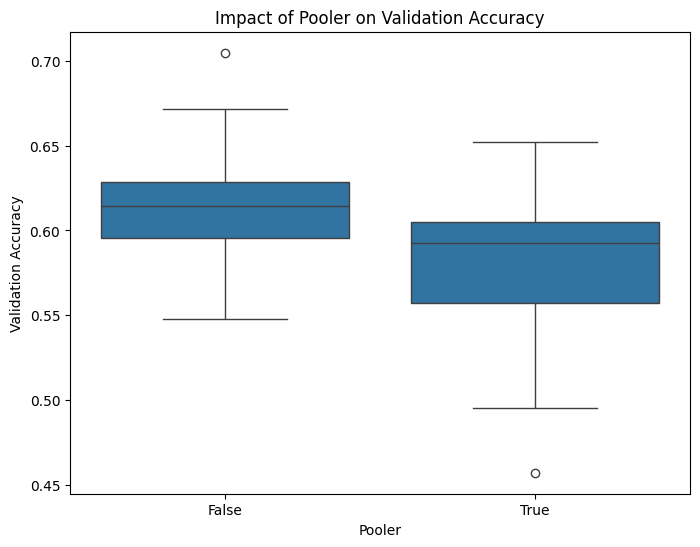

In [13]:
# pooler distributions

plt.figure(figsize=(8, 6))
sns.boxplot(x='pooler', y='val_accuracy', data=results_BERT)
plt.title('Impact of Pooler on Validation Accuracy')
plt.xlabel('Pooler')
plt.ylabel('Validation Accuracy')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

Looks like the CLS token works better for BERT.

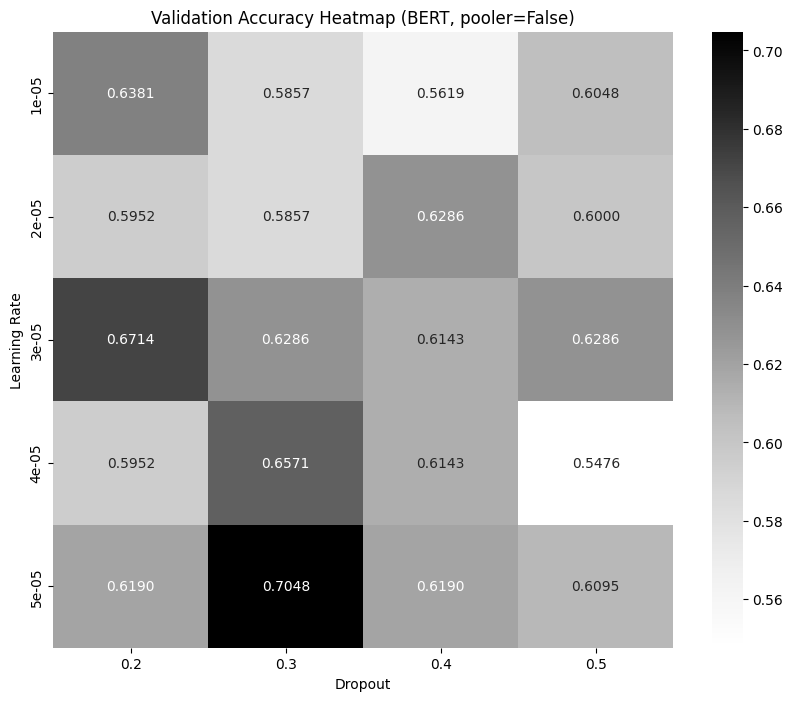

In [27]:
# Filter for pooler=False
results_BERT_filtered = results_BERT[results_BERT['pooler'] == False]

# Create the pivot table
heatmap_data = results_BERT_filtered.pivot_table(index='learning_rate', columns='dropout', values='val_accuracy')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="Greys", fmt=".4f")
plt.title('Validation Accuracy Heatmap (BERT, pooler=False)')
plt.xlabel('Dropout')
plt.ylabel('Learning Rate')
plt.show()

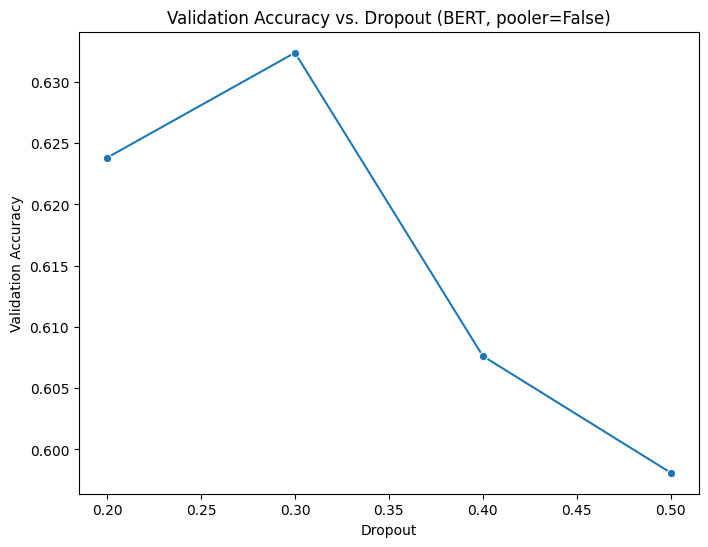

In [23]:
# Validation Accuracy vs. Dropout, Pooler=False
results_BERT_filtered = results_BERT[results_BERT['pooler'] == False]

plt.figure(figsize=(8, 6))
sns.lineplot(x='dropout', y='val_accuracy', data=results_BERT_filtered, marker='o', errorbar=None)
plt.title('Validation Accuracy vs. Dropout (BERT, pooler=False)')
plt.xlabel('Dropout')
plt.ylabel('Validation Accuracy')
plt.show()

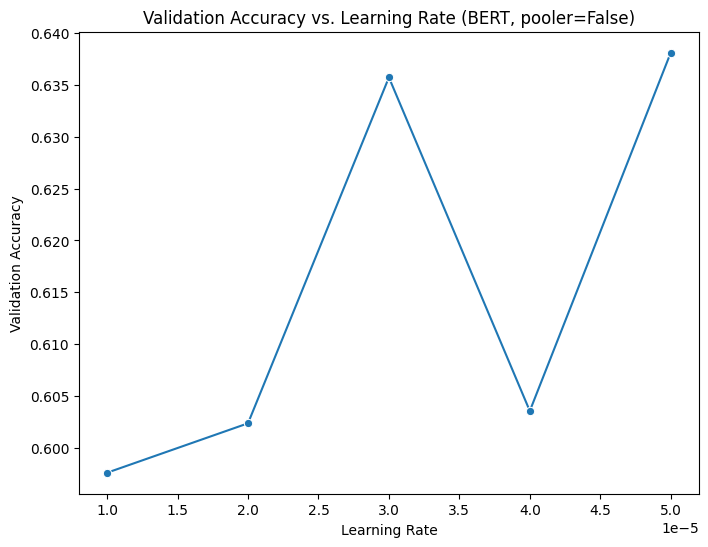

In [26]:
# Validation Accuracy vs. Learning Rate, Pooler=False
plt.figure(figsize=(8, 6))
sns.lineplot(x='learning_rate', y='val_accuracy', data=results_BERT_filtered, marker='o', errorbar=None)
plt.title('Validation Accuracy vs. Learning Rate (BERT, pooler=False)')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.show()

It seems like a higher learning rate of 5e-5 is prefered, from the heatmap and the line graph above. It seems like a dropout of 0.3 performed the best overall in the line graph, and also corresponds to the highest accuracy cell in the heatmap.

**Baseline hyperparameters:**

learning rate = 5e-5

dropout = 0.3

pooler = False (use CLS token)

# ClimateBERT Analysis

In [41]:
results_climateBERT.head()

,dropout,learning_rate,pooler,val_accuracy
0,0.5,0.00005,True,0.733333
1,0.3,0.00004,True,0.709524
2,0.2,0.00005,False,0.700000
3,0.5,0.00005,False,0.700000
4,0.2,0.00004,True,0.695238


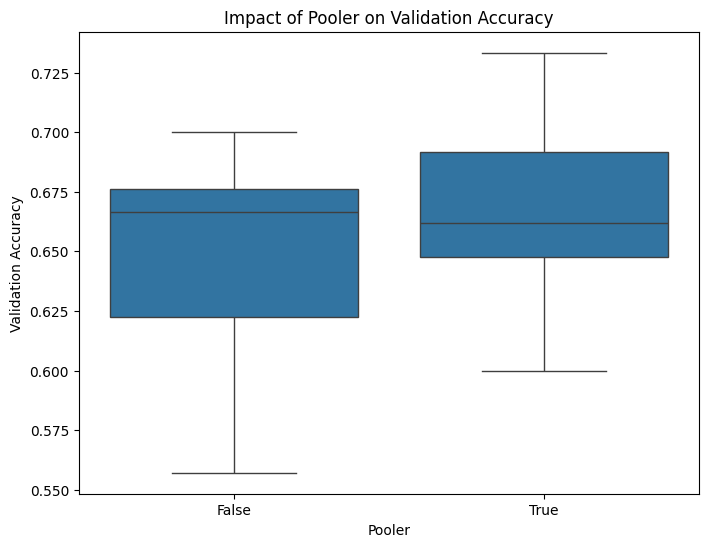

In [28]:
# pooler distributions

plt.figure(figsize=(8, 6))
sns.boxplot(x='pooler', y='val_accuracy', data=results_climateBERT)
plt.title('Impact of Pooler on Validation Accuracy')
plt.xlabel('Pooler')
plt.ylabel('Validation Accuracy')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

This is tough because the median of the CLS token (False) is higher than the median of the pooler token (True), but the distribution of the pooler token is higher. Let's look at other variables.

I need a better look at each distribution. I'm going to make some histograms.

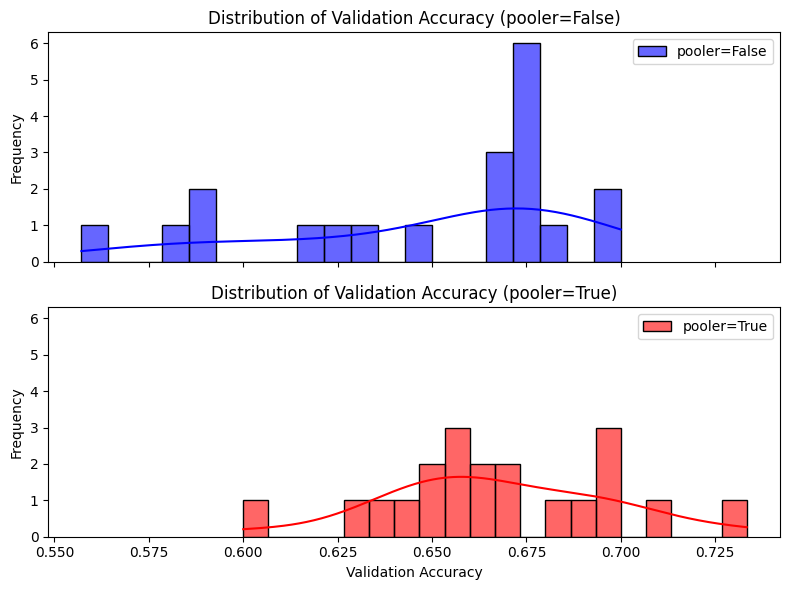

In [35]:
# Filter the data for pooler=False and pooler=True
results_pooler_false = results_climateBERT[results_climateBERT['pooler'] == False]
results_pooler_true = results_climateBERT[results_climateBERT['pooler'] == True]

# Create the figure and the subplots (one on top of the other)
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=True)

# Plot the histogram for pooler=False on the first subplot
sns.histplot(results_pooler_false['val_accuracy'], color='blue', label='pooler=False', kde=True, bins=20, alpha=0.6, ax=axes[0])
axes[0].set_title('Distribution of Validation Accuracy (pooler=False)')
axes[0].set_xlabel('Validation Accuracy')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot the histogram for pooler=True on the second subplot
sns.histplot(results_pooler_true['val_accuracy'], color='red', label='pooler=True', kde=True, bins=20, alpha=0.6, ax=axes[1])
axes[1].set_title('Distribution of Validation Accuracy (pooler=True)')
axes[1].set_xlabel('Validation Accuracy')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

It seems like we could benefit from repeat tests on a few hyperparameters. The CLS token results seem to be less reliable.

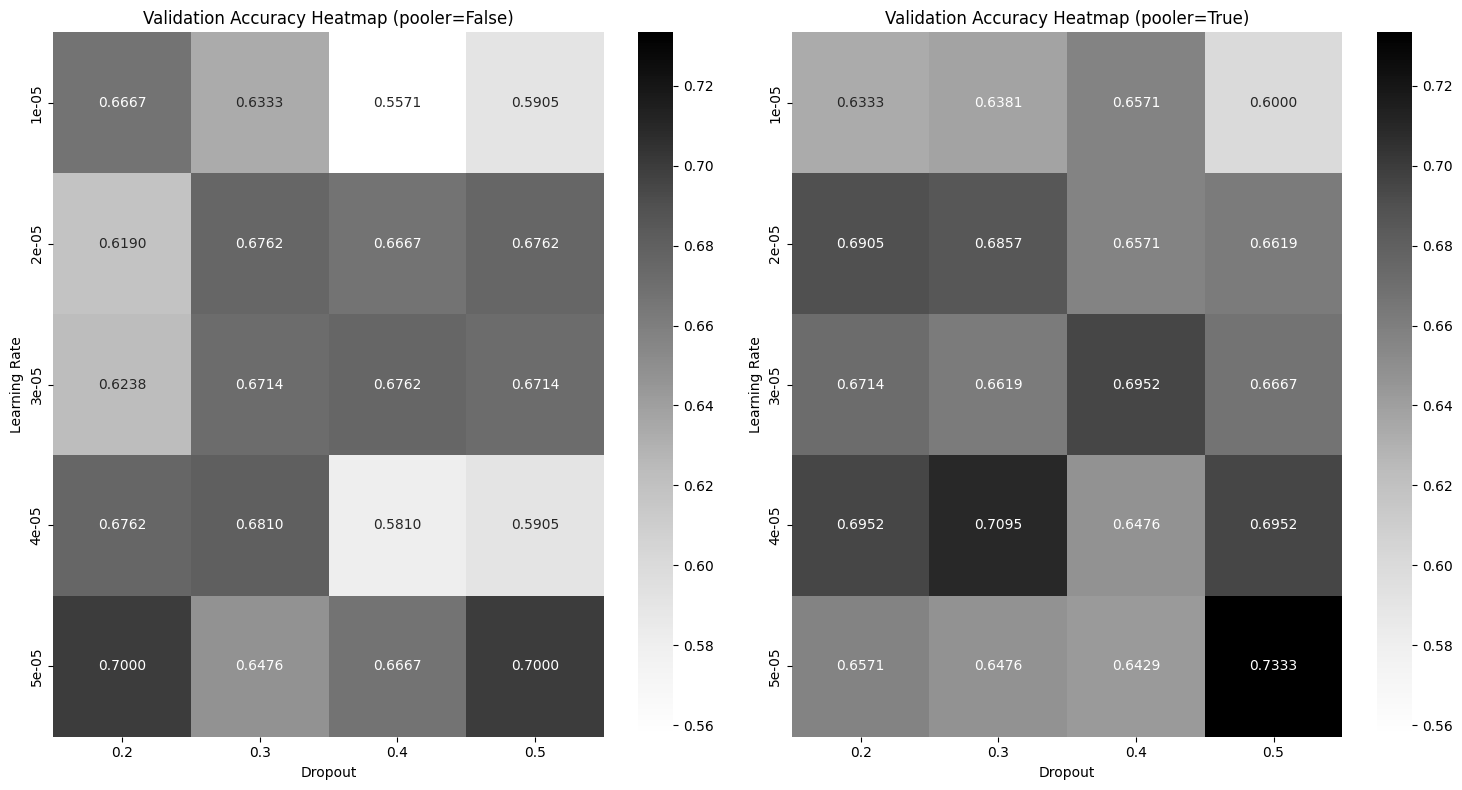

In [40]:
# Filter for pooler
results_pooler_false = results_climateBERT[results_climateBERT['pooler'] == False]
results_pooler_true = results_climateBERT[results_climateBERT['pooler'] == True]

# Create the pivot tables
heatmap_data_false = results_pooler_false.pivot_table(index='learning_rate', columns='dropout', values='val_accuracy')
heatmap_data_true = results_pooler_true.pivot_table(index='learning_rate', columns='dropout', values='val_accuracy')

# Compute the global min and max values for consistent color scale
vmin = min(heatmap_data_false.min().min(), heatmap_data_true.min().min())
vmax = max(heatmap_data_false.max().max(), heatmap_data_true.max().max())

# Create the figure and the subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot the heatmap for pooler=False with the shared color scale
sns.heatmap(heatmap_data_false, annot=True, cmap="Greys", fmt=".4f", ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title('Validation Accuracy Heatmap (pooler=False)')
axes[0].set_xlabel('Dropout')
axes[0].set_ylabel('Learning Rate')

# Plot the heatmap for pooler=True with the shared color scale
sns.heatmap(heatmap_data_true, annot=True, cmap="Greys", fmt=".4f", ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title('Validation Accuracy Heatmap (pooler=True)')
axes[1].set_xlabel('Dropout')
axes[1].set_ylabel('Learning Rate')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Results
After some deliberation, I've decided to go with the hyperparameters from the two best ClimateBERT scores. Because we're testing multiple iterations of climateBERT, let's add BERT's second best parameters to make things even. So we'll be look at these parameters.

BERT:

1.   dropout 0.3, learning rate = 5e-5, pooler = False
2.   dropout 0.2, learning rate 3e-5, pooler = False

ClimateBERT:
1.   dropout 0.2, learning rate 5e-5, pooler=True
2.   dropout 0.3, learning rate 4e-5, pooler=True

# Next Steps

I will be running each grid search in each modeling notebook (meral_climatebert_gridsearch for ClimateBERT and meral_baseline_modeling for BERT) so that I do not have to copy and paste a bunch of functions into a new notebook.

I will come back to this notebook with the results.